/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.3709834769552775

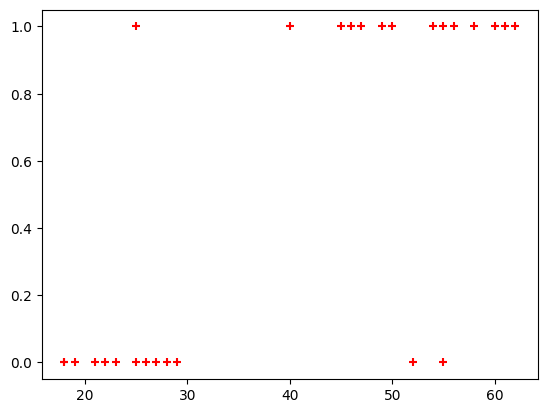

In [19]:

import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("insurance_data.csv")
df.head()

plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

X_test

y_test

y_predicted = model.predict(X_test)
y_predicted

model.score(X_test,y_test)

model.predict_proba(X_test)

y_predicted = model.predict([[60]])
y_predicted

#model.coef_ indicates value of m in y=m*x + b equation
model.coef_

#model.intercept_ indicates value of b in y=m*x + b equation
model.intercept_

#Lets defined sigmoid function now and do the math with hand
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y

age = 35
prediction_function(age)

# """0.37 is less than 0.5 which means person with 35 will not buy the insurance"""

Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


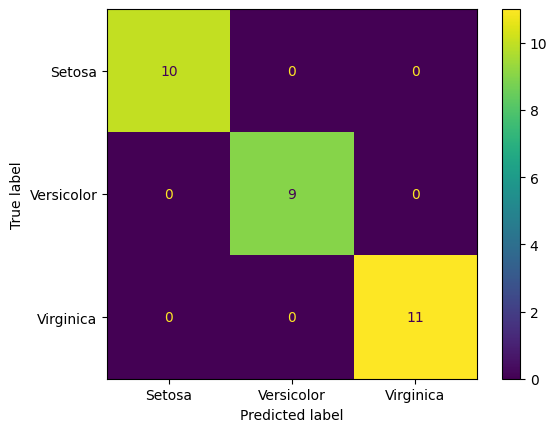

In [ ]:


# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the Iris dataset
iris =  pd.read_csv("iris.csv")
iris.head()

X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()

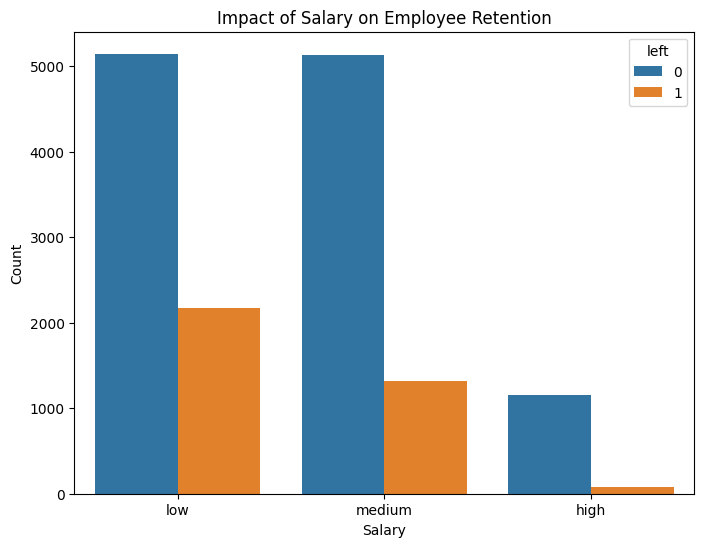

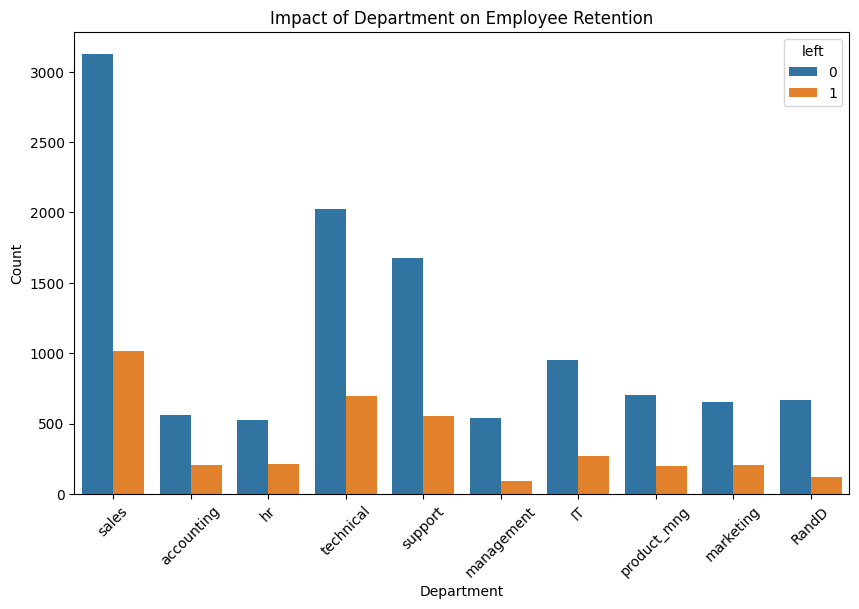

Accuracy of the logistic regression model: 0.7858


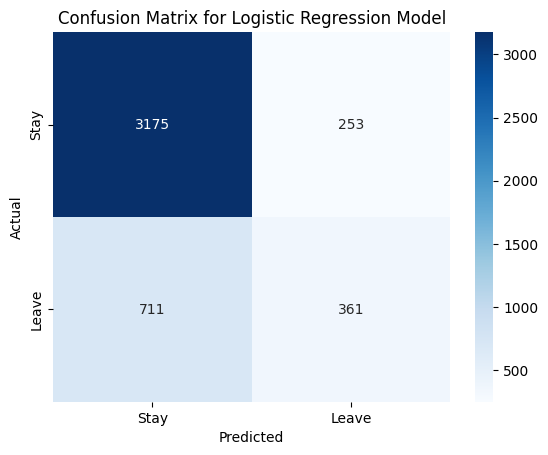

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv("HR_comma_sep.csv")

# Exploratory Data Analysis (EDA)

# Impact of Salary on Employee Retention
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=df)
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

# Impact of Department on Employee Retention
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='left', data=df)
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing
df_encoded = pd.get_dummies(df, columns=['salary', 'Department'], drop_first=True)
X = df_encoded.drop(columns=['left'])
y = df_encoded['left']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the logistic regression model: {accuracy:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Stay", "Leave"], yticklabels=["Stay", "Leave"])
plt.title("Confusion Matrix for Logistic Regression Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Class_Type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Accuracy of the Logistic Regression model: 0.9524


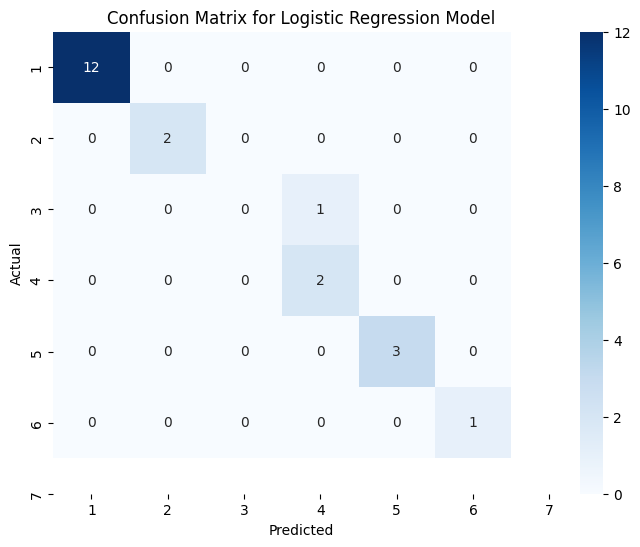

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer  # For handling missing values

# Load the datasets
zoo_data = pd.read_csv("zoo-data.csv")
class_type_data = pd.read_csv("zoo-class-type.csv")

# Merge zoo_data with class_type_data on Animal_Names
zoo_data = pd.merge(zoo_data, class_type_data[['Class_Number', 'Class_Type', 'Animal_Names']],
                    left_on='animal_name', right_on='Animal_Names', how='left')

# Drop the 'Animal_Names' column as it's redundant now
zoo_data.drop(columns=['Animal_Names'], inplace=True)

# Drop unnecessary columns (animal_name and Class_Number)
X = zoo_data.drop(columns=['class_type', 'animal_name', 'Class_Number'])

# The target variable (class_type)
y = zoo_data['class_type']

# Handle missing values in features (X) by imputing them with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)  # Apply the imputer to the features

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=200)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy:.4f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for Logistic Regression Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

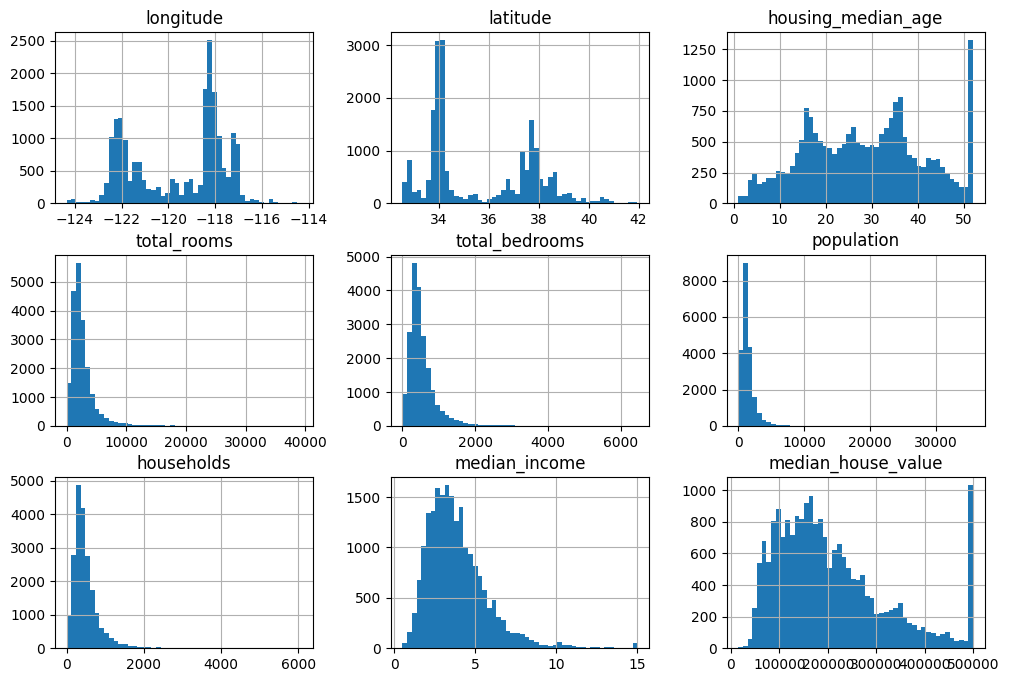

RMSE: 48744.058192170756


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Step 1: Load Data
def load_data():
    url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
    df = pd.read_csv(url)
    return df

# Step 2: Data Exploration
def explore_data(df):
    print(df.info())
    print(df.describe())
    df.hist(bins=50, figsize=(12, 8))
    plt.show()

# Step 3: Data Preparation
def prepare_data(df):
    df = df.dropna()  # Drop missing values for simplicity
    y = df["median_house_value"]
    X = df.drop("median_house_value", axis=1)

    num_features = X.select_dtypes(include=[np.number]).columns
    cat_features = ["ocean_proximity"]

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

    X_prepared = full_pipeline.fit_transform(X)
    return X_prepared, y, full_pipeline

# Step 4: Train Model
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Step 5: Evaluate Model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"RMSE: {rmse}")

# Step 6: Fine-tuning with GridSearch
def fine_tune_model(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Step 7: Save Model
def save_model(model, pipeline):
    joblib.dump(model, "final_model.pkl")
    joblib.dump(pipeline, "data_pipeline.pkl")

# Main Execution
if __name__ == "__main__":
    df = load_data()
    explore_data(df)
    X, y, pipeline = prepare_data(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = train_model(X_train, y_train)
    evaluate_model(model, X_test, y_test)
    best_model = fine_tune_model(X_train, y_train)
    evaluate_model(best_model, X_test, y_test)
    save_model(best_model, pipeline)
